**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*


In [55]:
from __future__ import print_function, division
import pylab as pl
import seaborn as sns

import os
import json

import statsmodels.api as sm
import statsmodels.formula.api as smf
#s = json.load( open(os.getenv('PUI2018')+"/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [56]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)
    


# 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

Text(0.5,1,'Errorbar plot of y = 0.9x')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


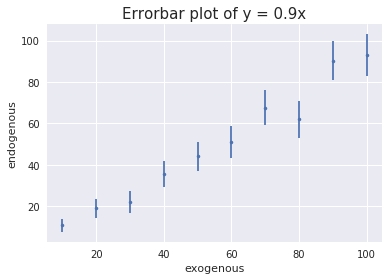

In [76]:
x = np.linspace(10, 100, 10)
y = line(0.9, x, 0, errors = errors)
plt.figure(figsize = (6,4))
plt.errorbar(x, y, yerr=errors(x), linestyle = 'none', fmt = '.')
plt.xlabel('exogenous')
plt.ylabel('endogenous')
plt.title('Errorbar plot of y = 0.9x', fontsize = 15)

# 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

In [77]:
print('Y values are',y)
print('X values are', x)

Y values are [ 10.68217629  18.87153856  22.05225826  35.44956501  44.11428814
  50.82820622  67.5959381   61.89905412  90.31590894  93.09577251]
X values are [  10.   20.   30.   40.   50.   60.   70.   80.   90.  100.]


In [78]:
print(sm.add_constant(x))

[[   1.   10.]
 [   1.   20.]
 [   1.   30.]
 [   1.   40.]
 [   1.   50.]
 [   1.   60.]
 [   1.   70.]
 [   1.   80.]
 [   1.   90.]
 [   1.  100.]]


# 3. use statsmodels.api.OLS to fit x and y 
- a. *the wrong way*: by passing x as exogenous variable
- b. *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

# and print the model summary for each and discuss the differences

In [79]:
#THE WRONG WAY
smfit = smf.OLS(y, x).fit()
smfit.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     1112.
Date:                Sun, 11 Nov 2018   Prob (F-statistic):           9.64e-11
Time:                        16:43:24   Log-Likelihood:                -30.413
No. Observations:                  10   AIC:                             62.83
Df Residuals:                       9   BIC:                             63.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.9076      0.027     33.354      0.000         0.846     0.969
==============================================================================
Omnibus:                        0.879   Durbin-Watson:                   2.928
Prob(Omnibus):                  0.644   Jarque-Bera (JB):                0.134
Skew:                          -0.281   Prob(JB):                        0.935
Kurtosis:                       2.929   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
#THE RIGHT WAY
smfit_right = smf.OLS(y, sm.add_constant(x)).fit()
smfit_right.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     233.0
Date:                Sun, 11 Nov 2018   Prob (F-statistic):           3.37e-07
Time:                        16:43:24   Log-Likelihood:                -30.246
No. Observations:                  10   AIC:                             64.49
Df Residuals:                       8   BIC:                             65.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -1.9835      3.804     -0.521      0.616       -10.756     6.789
x1             0.9359      0.061     15.264      0.000         0.795     1.077
==============================================================================
Omnibus:                        2.397   Durbin-Watson:                   3.028
Prob(Omnibus):                  0.302   Jarque-Bera (JB):                0.694
Skew:                          -0.638   Prob(JB):                        0.707
Kurtosis:                       3.189   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## From the two model summaries, we can find that by using the right way to fit the model, the R-squared decreased a little bit and the intercept was added to the model.

# 4. plot the data (as points) and both statsmodels fits

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


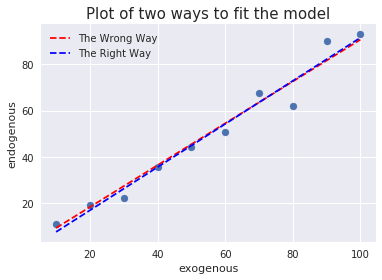

In [81]:
plt.figure(figsize = (6,4))
plt.scatter(x,y)
plt.plot(x,smfit.fittedvalues, 'r--', label = 'The Wrong Way')
plt.plot(x, smfit_right.fittedvalues, 'b--', label = 'The Right Way')
plt.xlabel('exogenous')
plt.ylabel('endogenous')
plt.title('Plot of two ways to fit the model', fontsize = 15)
plt.legend()

# 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

Text(0.5,1,'Errorbar plot of y = 0.9x + 108')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


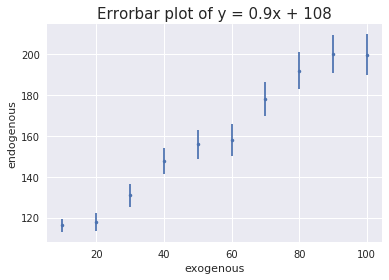

In [90]:
x = np.linspace(10, 100, 10)
y = line(0.9, x, 0.9*120, errors = errors)
plt.figure(figsize = (6,4))
plt.errorbar(x, y, yerr=errors(x), linestyle = 'none', fmt = '.')
plt.xlabel('exogenous')
plt.ylabel('endogenous')
plt.title('Errorbar plot of y = 0.9x + 108', fontsize = 15)

# 6. repeat step 3

In [91]:
smfit = smf.OLS(y, x).fit()
smfit.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     96.43
Date:                Sun, 11 Nov 2018   Prob (F-statistic):           4.16e-06
Time:                        16:44:57   Log-Likelihood:                -52.796
No. Observations:                  10   AIC:                             107.6
Df Residuals:                       9   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             2.5056      0.255      9.820      0.000         1.928     3.083
==============================================================================
Omnibus:                        0.306   Durbin-Watson:                   0.118
Prob(Omnibus):                  0.858   Jarque-Bera (JB):                0.426
Skew:                          -0.056   Prob(JB):                        0.808
Kurtosis:                       1.996   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
#THE RIGHT WAY
smfit_right = smf.OLS(y, sm.add_constant(x)).fit()
smfit_right.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     327.4
Date:                Sun, 11 Nov 2018   Prob (F-statistic):           8.94e-08
Time:                        16:44:58   Log-Likelihood:                -29.667
No. Observations:                  10   AIC:                             63.33
Df Residuals:                       8   BIC:                             63.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        102.1009      3.590     28.438      0.000        93.822   110.380
x1             1.0470      0.058     18.094      0.000         0.914     1.180
==============================================================================
Omnibus:                        2.906   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.234   Jarque-Bera (JB):                1.142
Skew:                          -0.392   Prob(JB):                        0.565
Kurtosis:                       1.541   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [93]:
smfit_WLS = smf.WLS(y, sm.add_constant(x), weights= 1/np.sqrt(x)).fit()
smfit_WLS.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.978
Model:                            WLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     363.8
Date:                Sun, 11 Nov 2018   Prob (F-statistic):           5.91e-08
Time:                        16:47:40   Log-Likelihood:                -29.507
No. Observations:                  10   AIC:                             63.01
Df Residuals:                       8   BIC:                             63.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        102.4218      2.912     35.174      0.000        95.707   109.137
x1             1.0419      0.055     19.074      0.000         0.916     1.168
==============================================================================
Omnibus:                        4.036   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.133   Jarque-Bera (JB):                1.253
Skew:                          -0.354   Prob(JB):                        0.534
Kurtosis:                       1.417   Cond. No.                         98.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Note: you can also use other statsmodels functions, for example statsmodels.formula.api which allows to pass an equation
again, make sure that your formula supports an intercept (no deliverable for this portion, it's up to you to explore the use of this function)

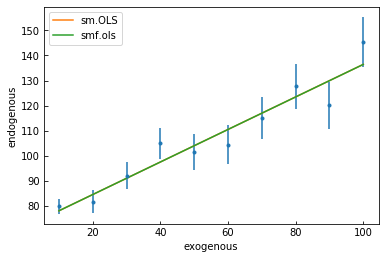

In [39]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
smfmodel = smf.ols('y ~ x + const', data={'x':x, 'y':y, 'const':np.ones(len(x))}).fit()
pl.errorbar(x, y, yerr=errors(x), fmt='.')
pl.plot(x, smfitDoneRight.fittedvalues, '-', label="sm.OLS")
pl.plot(x, smfmodel.fittedvalues, '-', label="smf.ols")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.legend();